# Transformacion de variables para conseguirt una relacion no lienal

In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
url = "https://raw.githubusercontent.com/joanby/python-ml-course/master/datasets/auto/auto-mpg.csv"
df = pd.read_csv(url)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [4]:
df.shape

(406, 9)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Consumo (millas por galeón)')

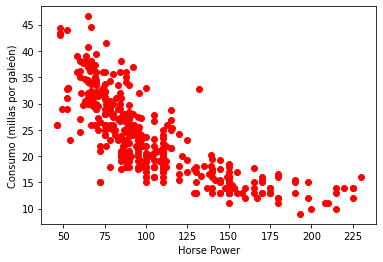

In [7]:
df["mpg"]= df["mpg"].dropna()
df["horsepower"] = df["horsepower"].dropna()
plt.plot(df["horsepower"], df["mpg"], "ro" )
plt.xlabel("Horse Power")
plt.ylabel("Consumo (millas por galeón)")

No parece que tiene una tendencia lineal, más bien parece ser que es explonencial o cuadrática.

# 1) Primero intentaremos ajustar a un modelo de regresion lineal.
* mpg = a + b * horsePower

In [20]:
X = df["horsepower"].fillna(df["horsepower"].mean())
Y = df["mpg"].fillna(df["mpg"].mean())
#Reemplazamos los NaN por los promedios respectivos


X_data = X[:,np.newaxis]

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/1119213551.py:6: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X[:,np.newaxis]


In [16]:
lm = LinearRegression()
lm.fit(X[:, np.newaxis], Y)

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/2316152923.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  lm.fit(X[:, np.newaxis], Y)


LinearRegression()

In [17]:
type(X)

pandas.core.series.Series

In [18]:
type(X[:, np.newaxis])

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/4224346640.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  type(X[:, np.newaxis])


numpy.ndarray

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/782082461.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(X, lm.predict(X[:,np.newaxis]), color="blue")


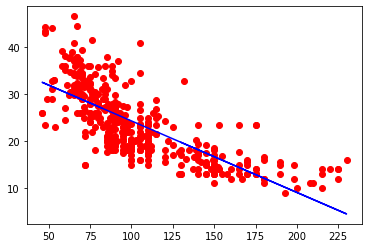

In [19]:
plt.plot(X, Y , "ro")
plt.plot(X, lm.predict(X[:,np.newaxis]), color="blue")

In [21]:
lm.score(X_data, Y)
#No es de los mas bajos que se pudiera obtener.

0.574653340645025

In [24]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

#Supone un error del 21%

(10315.75196006092, 5.046879480825511, 23.51457286432162, 21.46277336163346)

# Modelo de regresion cuadratico
* mpg = a+b*horsepowwer^2

In [25]:
X_data = X**2 # La unica diferencia es su valor al cuadrado.
X_data = X_data[:,np.newaxis]

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/3821541210.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = X_data[:,np.newaxis]


In [26]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression()

In [27]:
lm.score(X_data, Y)
# Ha bajado de un 57% a un 48%

0.4849887034823205

In [28]:
SSD = np.sum((Y - lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean
SSD, RSE, y_mean, error*100

#El error se ha incrementado un poco.

(12490.350340501926, 5.553410772769817, 23.51457286432162, 23.6168898529981)

# Modelo de regresion lineal y cuadratico
la mezcla de ambos modelos
* mpg = a+b*horsepowwer + c*horsepower^2

In [30]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [33]:
poly = PolynomialFeatures(degree=2) #Con el grado del polinomio igual a 2

In [36]:
X_data = poly.fit_transform(X[:,np.newaxis])

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/1653580747.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])


In [37]:
lm = linear_model.LinearRegression()
lm.fit(X_data, Y)

LinearRegression()

In [39]:
lm.score(X_data, Y)

#Aumenta el factor de R2 considerablemente. (Es BUENO)

0.6439066584257469

In [40]:
lm.intercept_

55.026192447080355

In [41]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 - -0.434 * horesepower + 0.00112615 * horsepower^2

In [ ]:
#Una posible prueba para ver como reacciona a distintos grados

In [50]:
for i in range(2,6):
    poly = PolynomialFeatures(degree=i)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm = linear_model.LinearRegression()
    lm.fit(X_data, Y)
    print("Regresion de grado: " + str(i)) 
    print(lm.score(X_data, Y))
    print(lm.intercept_)
    print(lm.coef_)
    print("\n")

Regresion de grado: 2
0.6439066584257469
55.026192447080355
[ 0.         -0.43404318  0.00112615]


Regresion de grado: 3
0.6444678885560744
58.448774111918084
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]


Regresion de grado: 4
0.6467674189704502
40.096643848138505
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840093e-08]


Regresion de grado: 5
0.6547512489366876
-40.693812896755176
[ 0.00000000e+00  4.00021432e+00 -7.54801920e-02  6.19621369e-04
 -2.36220932e-06  3.41982935e-09]




C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/931348025.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/931348025.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/931348025.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X_data = poly.fit_transform(X[:,np.newaxis])
C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/931348025.py:3: FutureWarning: Support for multi-dimensional 

In [ ]:
# podemos afirmar que el modelo no mejora añadiendole mas grados.

# El problema de los outliers

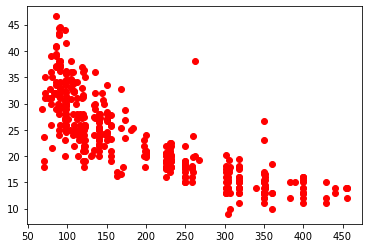

In [53]:
plt.plot(df["displacement"], df["mpg"], "ro")

In [55]:
X = df["displacement"].fillna(df["displacement"].mean())
Y = df["mpg"].fillna(df["mpg"].mean())
#Reemplazamos los NaN por los promedios respectivos
X = X[:,np.newaxis]


lm = LinearRegression()
lm.fit(X, Y)

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/4074913474.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


LinearRegression()

In [56]:
lm.score(X, Y)
#Se obtiene un factor que pudiera ser superior si se intentaran quitar outliers

0.6261049762826918

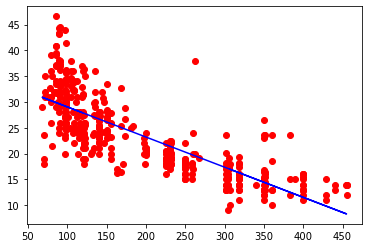

In [57]:
plt.plot(X, Y , "ro")
plt.plot(X, lm.predict(X), color="blue")

In [59]:
df[(df["displacement"]>250) & (df["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [62]:
df[(df["displacement"]>300) & (df["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [66]:
data_auto_cleam = df.drop([395,258,305,372])

In [67]:
X = data_auto_cleam["displacement"].fillna(df["displacement"].mean())
Y = data_auto_cleam["mpg"].fillna(df["mpg"].mean())
#Reemplazamos los NaN por los promedios respectivos
X = X[:,np.newaxis]


lm = LinearRegression()
lm.fit(X, Y)

C:\Users\Alberto\AppData\Local\Temp/ipykernel_3440/1938817360.py:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X = X[:,np.newaxis]


LinearRegression()

In [68]:
lm.score(X, Y)

0.646556489442804

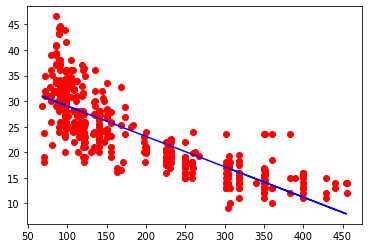

In [69]:
plt.plot(X, Y , "ro")
plt.plot(X, lm.predict(X), color="blue")